In [2]:
import pandas as pd

In [378]:
test=pd.read_csv('fs_sept_23.csv')

In [379]:
test.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,32298471,CANCELLED,2021-09-18T16:06:53,2021-09-23T16:07:08,40960Mn,1444.08M,5-00:00:00,5-00:00:15,4,4,turing,0:15
1,32305950_243,COMPLETED,2021-09-23T00:44:26,2021-09-28T17:55:34,15360Mn,103.37M,14-00:00:00,5-17:11:08,1,1,production,0:00
2,32305950_244,COMPLETED,2021-09-23T01:29:29,2021-09-28T16:28:38,15360Mn,105.20M,14-00:00:00,5-14:59:09,1,1,production,0:00
3,32305950_245,COMPLETED,2021-09-23T02:14:29,2021-09-30T23:15:56,15360Mn,0.09M,14-00:00:00,7-21:01:27,1,1,production,0:00
4,32305950_246,COMPLETED,2021-09-23T03:04:29,2021-10-01T00:13:15,15360Mn,103.37M,14-00:00:00,7-21:08:46,1,1,production,0:00


In [381]:
#Oct 25 -Converting to DateTime Format
test['BEGIN']=pd.to_datetime(test['BEGIN'], format='%Y-%m-%dT%H:%M:%S')
test['END']=pd.to_datetime(test['END'], format='%Y-%m-%dT%H:%M:%S')


In [387]:
#Subset for completed jobs with setting End to index
#Oct 25 -Reset whole df with index to END in place #26 modified from ('BEGIN', inplace=True) to
end_time=test.set_index('END')

In [465]:
#Oct 25: Getting Completed Jobs
completed=end_time.loc[end_time['STATE']=='COMPLETED']

In [466]:
completed['JOBID'].resample(pd.Timedelta('24 hours')).count()

END
2021-09-23    9975
2021-09-24     893
2021-09-25     240
2021-09-26       2
2021-09-27       3
2021-09-28      15
2021-09-29      11
2021-09-30       3
2021-10-01       4
2021-10-02       1
2021-10-03       1
Freq: D, Name: JOBID, dtype: int64

In [467]:
completed['JOBID'].resample(pd.Timedelta('1 hour')).count()

END
2021-09-23 00:00:00    1132
2021-09-23 01:00:00     253
2021-09-23 02:00:00     224
2021-09-23 03:00:00     188
2021-09-23 04:00:00     196
                       ... 
2021-10-03 10:00:00       0
2021-10-03 11:00:00       0
2021-10-03 12:00:00       0
2021-10-03 13:00:00       0
2021-10-03 14:00:00       1
Freq: H, Name: JOBID, Length: 255, dtype: int64

In [393]:
#Oct 25: Groupping completed by Hour
completed_by_hour=completed.resample('H').count()

In [418]:
completed_by_hour.head()

,JOBID,STATE,BEGIN,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
END,,,,,,,,,,,
2021-09-23 00:00:00,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132
2021-09-23 01:00:00,253,253,253,253,253,253,253,253,253,253,253
2021-09-23 02:00:00,224,224,224,224,224,224,224,224,224,224,224
2021-09-23 03:00:00,188,188,188,188,188,188,188,188,188,188,188
2021-09-23 04:00:00,196,196,196,196,196,196,196,196,196,196,196


In [401]:
#Completed Jobs
completed_jobs=completed_by_hour['JOBID']

<AxesSubplot:xlabel='END'>

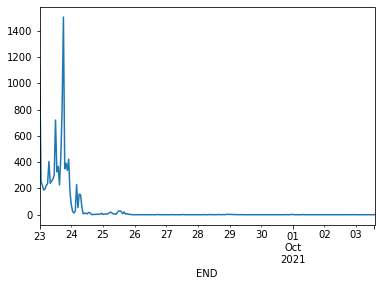

In [406]:
#Completed Jobs by DAY?
completed_jobs.plot()


In [426]:
completed_jobs.head()

END
2021-09-23 00:00:00    1132
2021-09-23 01:00:00     253
2021-09-23 02:00:00     224
2021-09-23 03:00:00     188
2021-09-23 04:00:00     196
Freq: H, Name: JOBID, dtype: int64

In [408]:
#Jobs that have not been completed
not_completed=end_time.loc[test1['STATE']!='COMPLETED']

In [410]:
not_completed_by_hour=not_completed.resample('H').count()

In [414]:
not_complete_by_state=not_completed_by_hour['STATE']

<AxesSubplot:xlabel='END'>

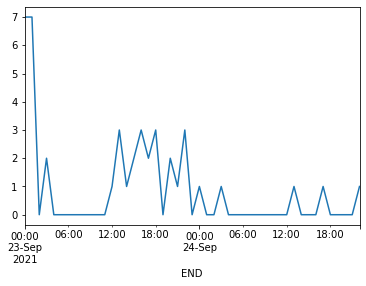

In [415]:
not_complete_by_state.plot()

<AxesSubplot:xlabel='END'>

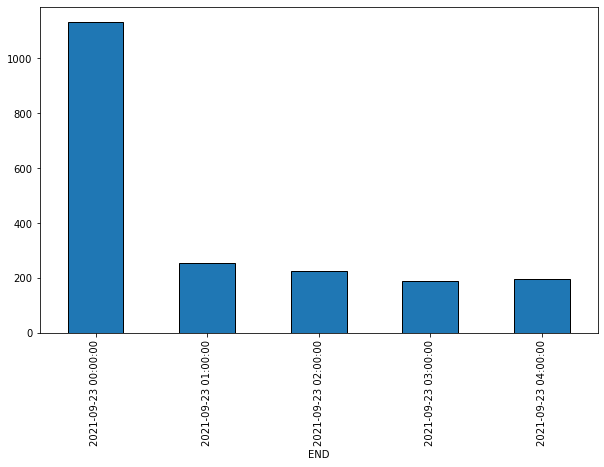

In [417]:
completed_by_hour['STATE'].head().plot(kind='bar', edgecolor='black', figsize=(10,6))


In [198]:
not_completed[not_completed['EXITCODE']!=0].count()

JOBID        42
STATE        42
END          42
REQMEM       42
USEDMEM      42
REQTIME      42
USEDTIME     42
NODES        42
CPUS         42
PARTITION    42
EXITCODE     42
dtype: int64

<AxesSubplot:xlabel='BEGIN,BEGIN'>

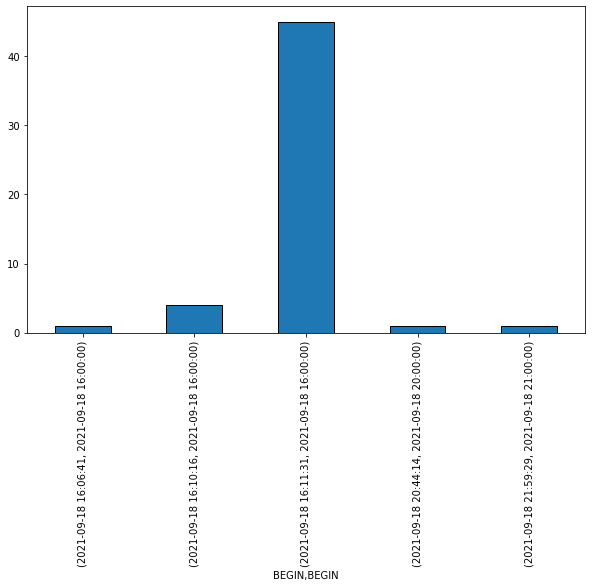

In [187]:
completed_by_hour['JOBID'].head().plot(kind='bar', edgecolor='black', figsize=(10,6))


In [207]:
completed['PARTITION'].unique()

array(['production', 'cgw-dougherty1', 'pascal', 'turing', 'cgw-capra1',
       'nogpfs', 'cgw-maizie', 'maxwell', 'sam', 'cgw-platypus',
       'cgw-hanuman', 'debug'], dtype=object)

In [211]:
#Completed Jobs by Partition
((completed.groupby('PARTITION').agg({'PARTITION':'count'}))/completed.count())*100

,CPUS,END,EXITCODE,JOBID,NODES,PARTITION,REQMEM,REQTIME,STATE,USEDMEM,USEDTIME
PARTITION,,,,,,,,,,,
cgw-capra1,NaN,NaN,NaN,NaN,NaN,0.026911,NaN,NaN,NaN,NaN,NaN
cgw-dougherty1,NaN,NaN,NaN,NaN,NaN,0.008970,NaN,NaN,NaN,NaN,NaN
cgw-hanuman,NaN,NaN,NaN,NaN,NaN,0.017940,NaN,NaN,NaN,NaN,NaN
cgw-maizie,NaN,NaN,NaN,NaN,NaN,0.026911,NaN,NaN,NaN,NaN,NaN
cgw-platypus,NaN,NaN,NaN,NaN,NaN,0.044851,NaN,NaN,NaN,NaN,NaN
debug,NaN,NaN,NaN,NaN,NaN,0.044851,NaN,NaN,NaN,NaN,NaN
maxwell,NaN,NaN,NaN,NaN,NaN,0.116613,NaN,NaN,NaN,NaN,NaN
nogpfs,NaN,NaN,NaN,NaN,NaN,1.345533,NaN,NaN,NaN,NaN,NaN
pascal,NaN,NaN,NaN,NaN,NaN,3.740581,NaN,NaN,NaN,NaN,NaN


In [221]:
#Completed VS NotCompleted
test1.groupby('STATE').agg({'STATE':'count'})

,STATE
STATE,
CANCELLED,17
CANCELLED by 783531,1
CANCELLED by 790983,1
CANCELLED by 885613,13
CANCELLED by 889553,1
COMPLETED,11148
FAILED,9


In [226]:
jobs_completed=completed_by_hour['JOBID']

In [230]:
jobs_completed.head()

BEGIN                BEGIN              
2021-09-18 16:06:41  2021-09-18 16:00:00     1
2021-09-18 16:10:16  2021-09-18 16:00:00     4
2021-09-18 16:11:31  2021-09-18 16:00:00    45
2021-09-18 20:44:14  2021-09-18 20:00:00     1
2021-09-18 21:59:29  2021-09-18 21:00:00     1
Name: JOBID, dtype: int64

In [222]:
#with open ('fullsample.csv') as file:
    #file.readline()

FileNotFoundError: [Errno 2] No such file or directory: 'fullsample.csv'

In [238]:
test1.head()

,JOBID,STATE,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
BEGIN,,,,,,,,,,,
2021-09-18 16:06:53,32298471,CANCELLED,2021-09-23 16:07:08,40960Mn,1444.08M,5-00:00:00,5-00:00:15,4,4,turing,0:15
2021-09-23 00:44:26,32305950_243,COMPLETED,2021-09-28 17:55:34,15360Mn,103.37M,14-00:00:00,5-17:11:08,1,1,production,0:00
2021-09-23 01:29:29,32305950_244,COMPLETED,2021-09-28 16:28:38,15360Mn,105.20M,14-00:00:00,5-14:59:09,1,1,production,0:00
2021-09-23 02:14:29,32305950_245,COMPLETED,2021-09-30 23:15:56,15360Mn,0.09M,14-00:00:00,7-21:01:27,1,1,production,0:00
2021-09-23 03:04:29,32305950_246,COMPLETED,2021-10-01 00:13:15,15360Mn,103.37M,14-00:00:00,7-21:08:46,1,1,production,0:00


In [ ]:
test1

In [249]:
test1.groupby('BEGIN')['STATE','JOBID'].resample('H').count()

C:\Users\U6033919\AppData\Local\Temp/ipykernel_20092/1833511314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test1.groupby('BEGIN')['STATE','JOBID'].resample('H').count()


,,STATE,JOBID
BEGIN,BEGIN,,
2021-09-18 16:06:41,2021-09-18 16:00:00,1,1
2021-09-18 16:06:53,2021-09-18 16:00:00,1,1
2021-09-18 16:10:16,2021-09-18 16:00:00,4,4
2021-09-18 16:11:31,2021-09-18 16:00:00,45,45
2021-09-18 20:44:14,2021-09-18 20:00:00,1,1
...,...,...,...
2021-09-23 23:57:42,2021-09-23 23:00:00,1,1
2021-09-23 23:58:32,2021-09-23 23:00:00,1,1
2021-09-23 23:58:44,2021-09-23 23:00:00,1,1


In [235]:
test1.head()

,JOBID,STATE,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
BEGIN,,,,,,,,,,,
2021-09-18 16:06:53,32298471,CANCELLED,2021-09-23 16:07:08,40960Mn,1444.08M,5-00:00:00,5-00:00:15,4,4,turing,0:15
2021-09-23 00:44:26,32305950_243,COMPLETED,2021-09-28 17:55:34,15360Mn,103.37M,14-00:00:00,5-17:11:08,1,1,production,0:00
2021-09-23 01:29:29,32305950_244,COMPLETED,2021-09-28 16:28:38,15360Mn,105.20M,14-00:00:00,5-14:59:09,1,1,production,0:00
2021-09-23 02:14:29,32305950_245,COMPLETED,2021-09-30 23:15:56,15360Mn,0.09M,14-00:00:00,7-21:01:27,1,1,production,0:00
2021-09-23 03:04:29,32305950_246,COMPLETED,2021-10-01 00:13:15,15360Mn,103.37M,14-00:00:00,7-21:08:46,1,1,production,0:00


In [260]:
zz =test1.groupby(['BEGIN', 'STATE']).resample('H').count()
zz

,,,JOBID,STATE,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
BEGIN,STATE,BEGIN,,,,,,,,,,,
2021-09-18 16:06:41,COMPLETED,2021-09-18 16:00:00,1,1,1,1,1,1,1,1,1,1,1
2021-09-18 16:06:53,CANCELLED,2021-09-18 16:00:00,1,1,1,1,1,1,1,1,1,1,1
2021-09-18 16:10:16,COMPLETED,2021-09-18 16:00:00,4,4,4,4,4,4,4,4,4,4,4
2021-09-18 16:11:31,COMPLETED,2021-09-18 16:00:00,45,45,45,45,45,45,45,45,45,45,45
2021-09-18 20:44:14,COMPLETED,2021-09-18 20:00:00,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-23 23:57:42,COMPLETED,2021-09-23 23:00:00,1,1,1,1,1,1,1,1,1,1,1
2021-09-23 23:58:32,COMPLETED,2021-09-23 23:00:00,1,1,1,1,1,1,1,1,1,1,1
2021-09-23 23:58:44,COMPLETED,2021-09-23 23:00:00,1,1,1,1,1,1,1,1,1,1,1


In [433]:
test.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,32298471,CANCELLED,2021-09-18 16:06:53,2021-09-23 16:07:08,40960Mn,1444.08M,5-00:00:00,5-00:00:15,4,4,turing,0:15
1,32305950_243,COMPLETED,2021-09-23 00:44:26,2021-09-28 17:55:34,15360Mn,103.37M,14-00:00:00,5-17:11:08,1,1,production,0:00
2,32305950_244,COMPLETED,2021-09-23 01:29:29,2021-09-28 16:28:38,15360Mn,105.20M,14-00:00:00,5-14:59:09,1,1,production,0:00
3,32305950_245,COMPLETED,2021-09-23 02:14:29,2021-09-30 23:15:56,15360Mn,0.09M,14-00:00:00,7-21:01:27,1,1,production,0:00
4,32305950_246,COMPLETED,2021-09-23 03:04:29,2021-10-01 00:13:15,15360Mn,103.37M,14-00:00:00,7-21:08:46,1,1,production,0:00


In [456]:
from datetime import timedelta

bins = pd.date_range(test['END'].min()+timedelta(minutes=-60), test['END'].max()+timedelta(minutes=60), freq='60min')
df_temp = test.loc[:, ['END', 'STATE']]
df_temp["bins"] = pd.cut(df_temp['END'], bins=bins)
df_temp['period'] = [x.right for x in df_temp['bins']]
jobs_state_hourly = df_temp.groupby(['period', 'STATE']).agg({'END': 'count'}).reset_index()
jobs_state_hourly

,period,STATE,END
0,2021-09-23 00:00:07,COMPLETED,1
1,2021-09-23 01:00:07,CANCELLED,1
2,2021-09-23 01:00:07,CANCELLED by 885613,5
3,2021-09-23 01:00:07,COMPLETED,1131
4,2021-09-23 01:00:07,FAILED,1
...,...,...,...
120,2021-10-01 01:00:07,COMPLETED,2
121,2021-10-01 08:00:07,COMPLETED,1
122,2021-10-01 09:00:07,COMPLETED,1
123,2021-10-02 22:00:07,COMPLETED,1


In [460]:
jobs_pivot_tbl = jobs_state_hourly.pivot(columns='STATE', index='period', values='END')

Index(['CANCELLED', 'CANCELLED by 783531', 'CANCELLED by 790983',
       'CANCELLED by 885613', 'CANCELLED by 889553', 'COMPLETED', 'FAILED'],
      dtype='object', name='STATE')

<AxesSubplot:xlabel='period'>

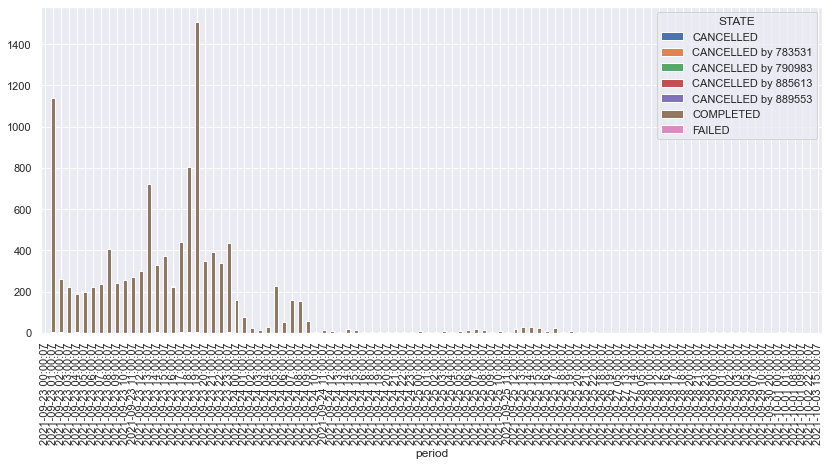

In [463]:
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

jobs_pivot_tbl.plot(kind='bar',stacked=True,legend=True, figsize=(14,6))
# ax.set_xticklabels(jobs_pivot_tbl.index, rotation=90, ha='right')

In [469]:
slurm=pd.read_csv('fullsample.csv')

In [476]:
slurm.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [486]:
slurm['BEGIN']=pd.to_datetime(slurm['BEGIN'], format='%Y-%m-%dT%H:%M:%S', errors='coerce' )
slurm['END']=pd.to_datetime(slurm['END'], format='%Y-%m-%dT%H:%M:%S', errors='coerce' )

In [487]:
bins = pd.date_range(slurm['END'].min()+timedelta(minutes=-60), test['END'].max()+timedelta(minutes=60), freq='60min')
df_temp1 = slurm.loc[:, ['END', 'STATE']]
df_temp1["bins"] = pd.cut(df_temp1['END'], bins=bins)
df_temp1['period'] = [x.right for x in df_temp1['bins']]
jobs_state_hourly1 = df_temp1.groupby(['period', 'STATE']).agg({'END': 'count'}).reset_index()
jobs_state_hourly1

AttributeError: 'float' object has no attribute 'right'